# Video Game Sales

## Introduction

The purpose of this project is to understand whether a new racing game for XBox One will sell well in Europe.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
# load the data
df = pd.read_csv('vgsales.csv')

In [151]:
# inspect the data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [152]:
# describe the data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [153]:
# check for null values
miss_perc = (df.isnull().sum()/len(df.Rank))*100
miss_perc

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

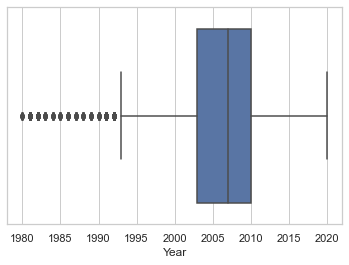

In [154]:
# view the Year data
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x = df['Year'])

In [155]:
# view publisher data
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
id Software                        1
Image Epoch                        1
Revolution (Japan)                 1
Bomb                               1
CBS Electronics                    1
Name: Publisher, Length: 578, dtype: int64

## Data Cleaning

In [156]:
# There are two columns with null values
# Two appraoches could be taken here:
# 1 drop rows with NA values - this is a quick, simple approach and there are very few null values so this would not have a large impact overall 
# 2 replace null values with average (e.g. mean for numeric and mode for categoric)
# apply approach 2

df['Year'].fillna(df['Year'].mean(), inplace=True)
df['Publisher'].fillna(df['Publisher'].mode()[0], inplace=True)

df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## EDA

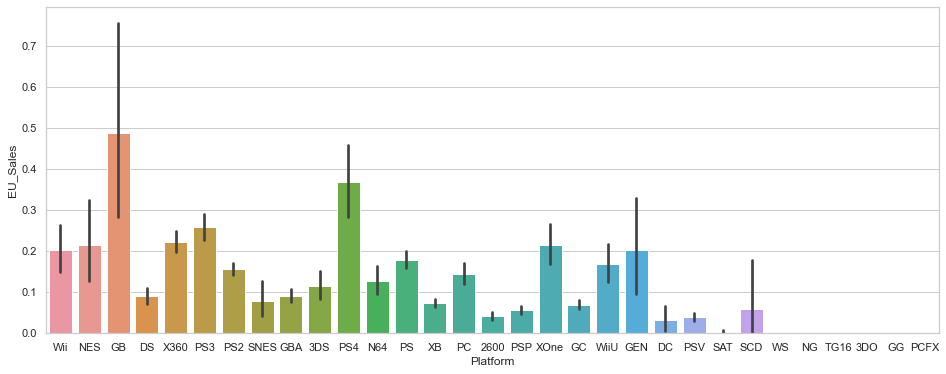

In [158]:
# plot some graphs to reveal trends
# ultimately we want to predict whether a racing game on XBox One ('XOne') will sell well in Europe
plt.figure(figsize=(16,6))
ax = sns.barplot(x = df['Platform'], y = df['EU_Sales'], data = df_platgenre)

# this shows that XBox One has relatively high sales

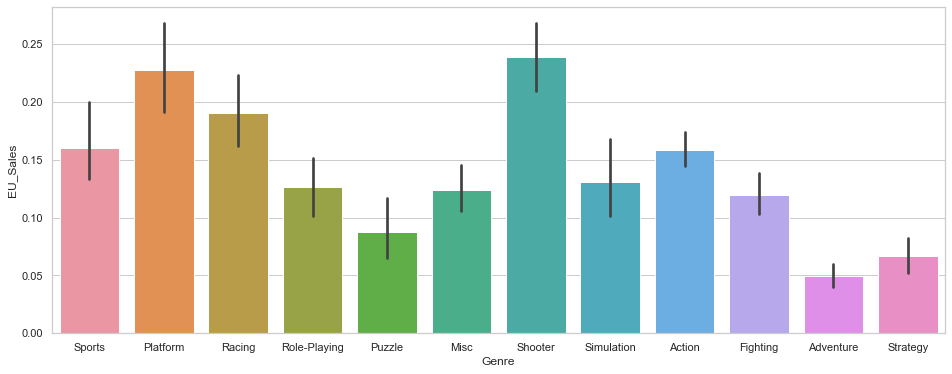

In [160]:
# investigate genre
plt.figure(figsize=(16,6))
ax = sns.barplot(x = df['Genre'], y = df['EU_Sales'], data = df_platgenre)

# this is promising as this shows racing games have the third highest EU sales

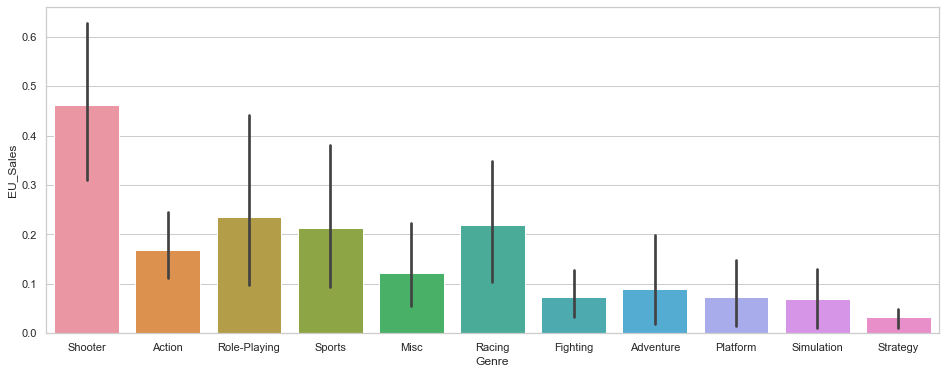

In [164]:
# plot a graph specifically for XBox One
df_XOne = df[df['Platform']=='XOne']

plt.figure(figsize=(16,6))
ax = sns.barplot(x = df_XOne['Genre'], y = df_XOne['EU_Sales'], data=df_XOne)

# again, this is promising as this shows that racing games are the genre with the third highest EU_Sales on XBox One

In [169]:
# save the cleaned dataset as a new file for model development